In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
import copy
import json
import pickle
from networkFunctions import *
from plotFunctions import *
from populationGraph import populationGraph
from adversarialAgent import adversarialAgent

In [17]:
my_dict = pickle.load(open('pickle_files/vary_type.pkl', 'rb'))
my_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': ['Utilitarian', 'Deontic', 'Virtue', 'Transcendence'],
 'advRatio': 0,
 'outcomeNetwork': {'Utilitarian': <populationGraph.populationGraph at 0x7f831558de20>,
  'Deontic': <populationGraph.populationGraph at 0x7f8315f87970>,
  'Virtue': <populationGraph.populationGraph at 0x7f831605c610>,
  'Transcendence': <populationGraph.populationGraph at 0x7f83160ce040>}}

In [3]:
best_util = my_dict["outcomeNetwork"]["Utilitarian"]

In [4]:
my_dict["outcomeNetwork"].keys()

dict_keys(['Utilitarian', 'Deonotology', 'Virtue', 'Transcendence (0.5)'])

In [5]:
# plotNetworkVaryParams(my_dict["outcomeNetwork"],'utility',attr="type",plotType='bar')

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x7f831558de20>, 'Deontic': <populationGraph.populationGraph object at 0x7f8315f87970>, 'Virtue': <populationGraph.populationGraph object at 0x7f831605c610>, 'Transcendence': <populationGraph.populationGraph object at 0x7f83160ce040>}


[9320, 3000, 8780, 9260]

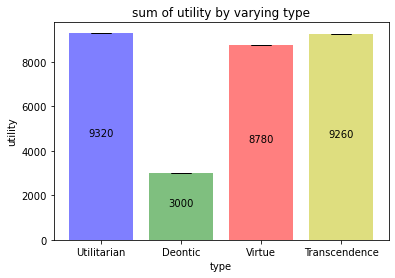

In [18]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'utility',"type",plotType='bar')

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x00000178FA8FAB90>, 'Deonotology': <populationGraph.populationGraph object at 0x00000178FE0A2800>, 'Virtue': <populationGraph.populationGraph object at 0x00000178FE324AF0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x00000178FA8FABC0>}


[1957.0, 1936.0, 1903.0, 1951.0]

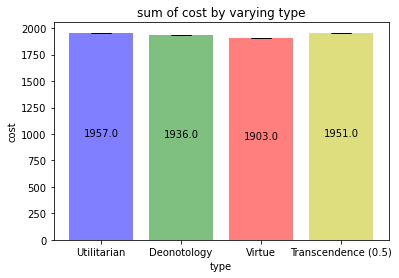

In [ ]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'cost',"type",plotType='bar')

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x00000178FA8FAB90>, 'Deonotology': <populationGraph.populationGraph object at 0x00000178FE0A2800>, 'Virtue': <populationGraph.populationGraph object at 0x00000178FE324AF0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x00000178FA8FABC0>}


[43, 41, 39, 42]

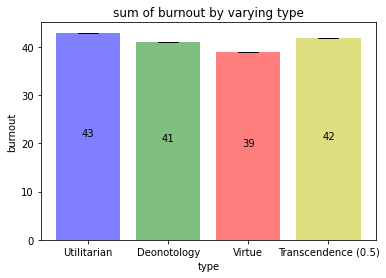

In [ ]:
plotNetworkVaryParams(my_dict["outcomeNetwork"],'burnout',"type",plotType='bar')

In [2]:
deontic_dict = pickle.load(open('pickle_files/AdvRatio/Deontic.pkl', 'rb'))
deontic_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': deonticAgent.deonticAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7f832af59340>,
  0.1: <populationGraph.populationGraph at 0x7f83314bb5b0>,
  0.2: <populationGraph.populationGraph at 0x7f8331401880>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7f8331445940>,
  0.4: <populationGraph.populationGraph at 0x7f832b85a8e0>,
  0.5: <populationGraph.populationGraph at 0x7f832b89e610>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7f8333012100>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7f8333056a90>,
  0.8: <populationGraph.populationGraph at 0x7f833309a2e0>,
  0.9: <populationGraph.populationGraph at 0x7f83330dc910>}}

outcome network  {0.0: <populationGraph.populationGraph object at 0x7fa55e1377f0>, 0.1: <populationGraph.populationGraph object at 0x7fa560ebb5e0>, 0.2: <populationGraph.populationGraph object at 0x7fa560e018b0>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7fa560e45970>, 0.4: <populationGraph.populationGraph object at 0x7fa55d661910>, 0.5: <populationGraph.populationGraph object at 0x7fa55d6a5640>, 0.6000000000000001: <populationGraph.populationGraph object at 0x7fa561a12130>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7fa561a56ac0>, 0.8: <populationGraph.populationGraph object at 0x7fa561a9a310>, 0.9: <populationGraph.populationGraph object at 0x7fa561adc940>}


[2600, 2460, 480, -680, -1940, -4120, -4580, -5760, -6280, -7740]

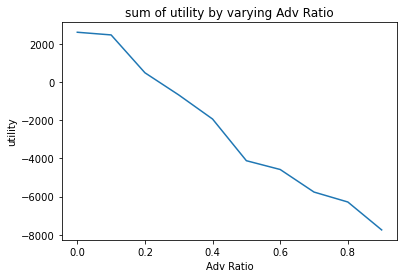

In [3]:
plotNetworkVaryParams(deontic_dict["outcomeNetwork"],'utility',"Adv Ratio")

In [3]:
util_dict = pickle.load(open('pickle_files/AdvRatio/Utilitarian.pkl', 'rb'))
util_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': utilitarianAgent.utilitarianAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7f832c3c6520>,
  0.1: <populationGraph.populationGraph at 0x7f83314cf7f0>,
  0.2: <populationGraph.populationGraph at 0x7f8333250a30>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7f8333292c70>,
  0.4: <populationGraph.populationGraph at 0x7f83332d3eb0>,
  0.5: <populationGraph.populationGraph at 0x7f8333516130>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7f8333598370>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7f83335da5b0>,
  0.8: <populationGraph.populationGraph at 0x7f833361b7f0>,
  0.9: <populationGraph.populationGraph at 0x7f833365ca30>}}

In [4]:
virtue_dict = pickle.load(open('pickle_files/AdvRatio/Virtue.pkl', 'rb'))
virtue_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': virtuousAgent.virtuousAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7f832c3bc670>,
  0.1: <populationGraph.populationGraph at 0x7f8333553cd0>,
  0.2: <populationGraph.populationGraph at 0x7f83336d7f10>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7f8333911e80>,
  0.4: <populationGraph.populationGraph at 0x7f8333958100>,
  0.5: <populationGraph.populationGraph at 0x7f833399a340>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7f8333b1d580>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7f8333b607c0>,
  0.8: <populationGraph.populationGraph at 0x7f8333ba3a00>,
  0.9: <populationGraph.populationGraph at 0x7f8333be5c40>}}

In [5]:
trans_dict = pickle.load(open('pickle_files/AdvRatio/Transcedence(0.5).pkl', 'rb'))
trans_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7f832c3bcfa0>,
  0.1: <populationGraph.populationGraph at 0x7f832ba02ca0>,
  0.2: <populationGraph.populationGraph at 0x7f8333ea1700>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7f8333f33580>,
  0.4: <populationGraph.populationGraph at 0x7f8333e7e400>,
  0.5: <populationGraph.populationGraph at 0x7f8333ff8bb0>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7f8334166b20>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7f83341cf550>,
  0.8: <populationGraph.populationGraph at 0x7f8334232c70>,
  0.9: <populationGraph.populationGraph at 0x7f833428c280>}}

In [6]:
translow_dict = pickle.load(open('pickle_files/AdvRatio/Transcedence(0.1).pkl', 'rb'))
transhigh_dict = pickle.load(open('pickle_files/AdvRatio/Transcedence(1).pkl', 'rb'))
transDict = {0.1:translow_dict["outcomeNetwork"],1:transhigh_dict["outcomeNetwork"]}

In [7]:
trans_dict_quarter = pickle.load(open('pickle_files/AdvRatio/Transcedence(0.25).pkl', 'rb'))
trans_dict_quarter

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7f83313b4bb0>,
  0.1: <populationGraph.populationGraph at 0x7f8333ed0160>,
  0.2: <populationGraph.populationGraph at 0x7f8334244970>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7f83152e86a0>,
  0.4: <populationGraph.populationGraph at 0x7f83156210a0>,
  0.5: <populationGraph.populationGraph at 0x7f8315934100>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7f83159a10a0>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7f8315c09af0>,
  0.8: <populationGraph.populationGraph at 0x7f8315c6bb80>,
  0.9: <populationGraph.populationGraph at 0x7f8315cc5100>}}

In [8]:
trans_dict_quarter2 = pickle.load(open('pickle_files/AdvRatio/Transcedence(0.75).pkl', 'rb'))
trans_dict_quarter2

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7f832c3bc700>,
  0.1: <populationGraph.populationGraph at 0x7f8333f69340>,
  0.2: <populationGraph.populationGraph at 0x7f83152eda30>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7f83158fe2e0>,
  0.4: <populationGraph.populationGraph at 0x7f8315c35820>,
  0.5: <populationGraph.populationGraph at 0x7f8315fc9430>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7f8316036370>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7f831609dd30>,
  0.8: <populationGraph.populationGraph at 0x7f8316200490>,
  0.9: <populationGraph.populationGraph at 0x7f8316259a60>}}

In [9]:
outcomeList = {"Deontology":deontic_dict["outcomeNetwork"], "Utilittarian":util_dict["outcomeNetwork"], "Transcendence(0.5)":trans_dict["outcomeNetwork"],
"Virtue":virtue_dict["outcomeNetwork"],"Transcendence(0.25)":trans_dict_quarter["outcomeNetwork"],"Transcendence(0.75)":trans_dict_quarter2["outcomeNetwork"]}

In [ ]:
for outcome in outcomeList:
    l = [outcomeList[outcome][val] for val in outcomeList[outcome]]
    print(l)

[<populationGraph.populationGraph object at 0x00000178FE3FB490>, <populationGraph.populationGraph object at 0x00000178823047C0>, <populationGraph.populationGraph object at 0x00000178FA8FB4F0>, <populationGraph.populationGraph object at 0x00000178800189D0>, <populationGraph.populationGraph object at 0x000001788001A530>]
[<populationGraph.populationGraph object at 0x00000178822E73A0>, <populationGraph.populationGraph object at 0x0000017880135ED0>, <populationGraph.populationGraph object at 0x0000017880137220>, <populationGraph.populationGraph object at 0x00000178801DC580>, <populationGraph.populationGraph object at 0x00000178801DD900>]
[<populationGraph.populationGraph object at 0x00000178FE3D14E0>, <populationGraph.populationGraph object at 0x0000017880441960>, <populationGraph.populationGraph object at 0x00000178804D92D0>, <populationGraph.populationGraph object at 0x0000017881526320>, <populationGraph.populationGraph object at 0x0000017881587D30>]
[<populationGraph.populationGraph obj

In [ ]:
for outcome in outcomeList:
    print([outcomeList[outcome][val].getNumNodes()*(1-val) for val in outcomeList[outcome]])
    # print(outcomeList[outcome])
outcomeList.keys()

[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]
[100.0, 80.0, 60.0, 39.99999999999999, 19.999999999999996]


dict_keys(['Deontology', 'Utilittarian', 'Transcendence(0.5)', 'Virtue', 'Transcendence(0.25)', 'Transcendence(0.75)'])

[1956.0, 1780.0, 1638.0, 1449.0, 1235.0]

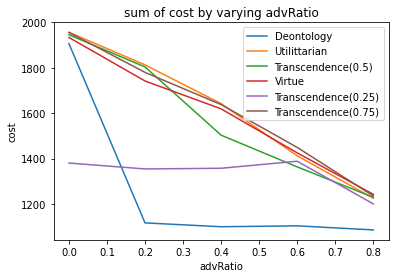

In [ ]:
plotComparative(outcomeList,"cost","advRatio")

In [14]:
transDict[0.1]

{0.0: <populationGraph.populationGraph at 0x7ffc7fd2cd30>,
 0.1: <populationGraph.populationGraph at 0x7ffc640abee0>,
 0.2: <populationGraph.populationGraph at 0x7ffc642ec610>,
 0.30000000000000004: <populationGraph.populationGraph at 0x7ffc64574a00>,
 0.4: <populationGraph.populationGraph at 0x7ffc646ac2b0>,
 0.5: <populationGraph.populationGraph at 0x7ffc64ac4a00>,
 0.6000000000000001: <populationGraph.populationGraph at 0x7ffc64b35bb0>,
 0.7000000000000001: <populationGraph.populationGraph at 0x7ffc64ba2af0>,
 0.8: <populationGraph.populationGraph at 0x7ffc64d03eb0>,
 0.9: <populationGraph.populationGraph at 0x7ffc64d5e4f0>}

In [ ]:
transDict[0.1][0.2].getGraph()

In [ ]:
# y_low = [np.sum(getNetworkProp(transDict[0.1][val].getGraph()/(transDict[0.1][val].getNumNodes()*(1-val)), 'burnout')) for val in transDict[0.1]]

In [ ]:
[np.sum(getNetworkProp(transDict[0.1][val].getGraph(), 'utility')) for val in transDict[0.1]]

[-2140, -2980, -4140, -5640, -6740]

AttributeError: 'int' object has no attribute 'getGraph'

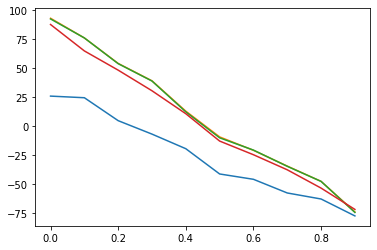

In [29]:
plotComparative_shaded(outcomeList,transDict,"utility","advRatio", metric="mean")

Text(0, 0.5, 'Total Cost')

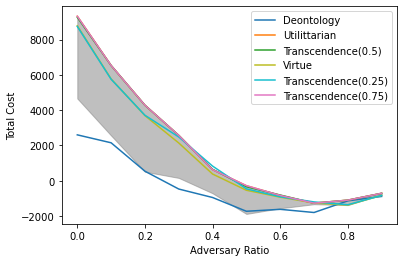

In [31]:
fig, ax = plt.subplots()
color_list = ['tab:blue','tab:orange','tab:green','tab:olive','tab:cyan','tab:pink']
count=0
for outcome in outcomeList:
    # print(outcom  e)
    var = outcomeList[outcome]
    y_vals = []
    y_vals_adv = []
    for graph in var:
        # print(var[graph])
        types = list(var[graph].getAgentMapping().values())
        # print(types)
        G = var[graph].getGraph()
        agentDict = {}
        for i in types:
            agentDict[i] = []
        for agents in G:
            agentType = G.nodes[agents]['agent'].getType()
            agentDict[agentType].append(G.nodes[agents]['agent'])
        # print(agentDict)
        for i in agentDict:
            if(len(agentDict[i]) != 0):
                agentDict[i] = np.sum([agent.getProperty('utility') for agent in agentDict[i]])
            else:
                agentDict[i] = 0
        # print(agentDict)
        y_vals.append(agentDict[types[0]])
        y_vals_adv.append(agentDict[types[1]])
    ax.plot(list(outcomeList[outcome].keys()), y_vals,color=color_list[count])
    count+=1
# ax.plot(list(outcomeList["Transcendence(0.5)"].keys()), y_vals_adv,color='r')
y_vals_trans = []
for outcome in transDict:
    var = transDict[outcome]
    y_vals = []
    # y_vals_adv = []
    for graph in var:
        types = list(var[graph].getAgentMapping().values())
        G = var[graph].getGraph()
        agentDict = {}
        for i in types:
            agentDict[i] = []
        for agents in G:
            agentType = G.nodes[agents]['agent'].getType()
            agentDict[agentType].append(G.nodes[agents]['agent'])
        for i in agentDict:
            if(len(agentDict[i]) != 0):
                agentDict[i] = np.sum([agent.getProperty('utility') for agent in agentDict[i]])
            else:
                agentDict[i] = 0
        y_vals.append(agentDict[types[0]])
    y_vals_trans.append(y_vals)
        # y_vals_adv.append(agentDict[types[1]])
    # ax.plot(list(outcomeList[outcome].keys()), y_vals)

ax.fill_between(list(transDict[0.1].keys()),y_vals_trans[0],y_vals_trans[1],color='grey',alpha=0.5)
list1 = list(outcomeList.keys())
# list1.append("Adversary") 
ax.legend(list1)
ax.set_xlabel("Adversary Ratio")
ax.set_ylabel("Total Cost")
# fig.savefig("results/adv/burnout.png", dpi=600)




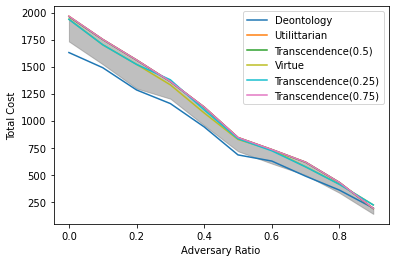

In [11]:
# new_dict = {"Transcendence":trans_dict["outcomeNetwork"]}
advRatio_shadedPlots(outcomeList,transDict,'cost')

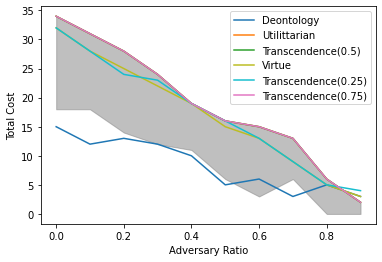

In [13]:
advRatio_shadedPlots(outcomeList,transDict,'burnout')

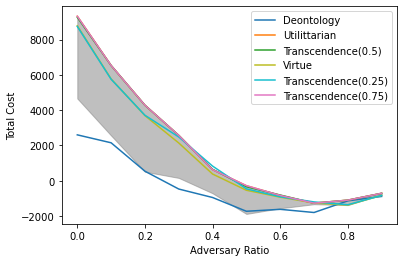

In [12]:
advRatio_shadedPlots(outcomeList,transDict,'utility')

[1939.0,
 1825.0,
 1742.0,
 1653.0,
 1554.0,
 1436.0,
 1377.0,
 1312.0,
 1233.0,
 1141.0]

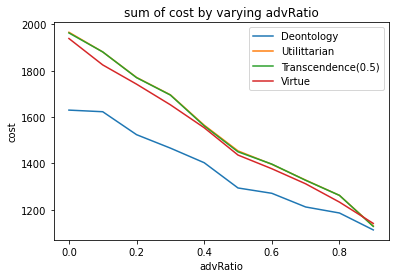

In [16]:
plotComparative(outcomeList,"cost","advRatio")

[19.39, 18.25, 17.42, 16.53, 15.54, 14.36, 13.77, 13.12, 12.33, 11.41]

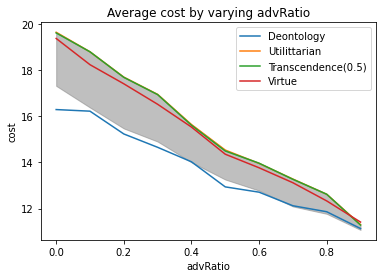

In [17]:
plotComparative_shaded(outcomeList,transDict,"cost","advRatio",metric="mean")

In [ ]:
num_msg_dict = pickle.load(open('pickle_files/vary_type_10kmsg', 'rb'))
num_msg_dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': ['Utilitarian', 'Deonotology', 'Virtue', 'Transcendence (0.5)'],
 'advRatio': 0,
 'outcomeNetwork': {'Utilitarian': <populationGraph.populationGraph at 0x22bc2b4ab90>,
  'Deonotology': <populationGraph.populationGraph at 0x22bc56cb0a0>,
  'Virtue': <populationGraph.populationGraph at 0x22bc4fae2c0>,
  'Transcendence (0.5)': <populationGraph.populationGraph at 0x22bc4f33b80>}}

outcome network  {'Utilitarian': <populationGraph.populationGraph object at 0x0000022BC2B4AB90>, 'Deonotology': <populationGraph.populationGraph object at 0x0000022BC56CB0A0>, 'Virtue': <populationGraph.populationGraph object at 0x0000022BC4FAE2C0>, 'Transcendence (0.5)': <populationGraph.populationGraph object at 0x0000022BC4F33B80>}


[81940, 46220, 81940, 81900]

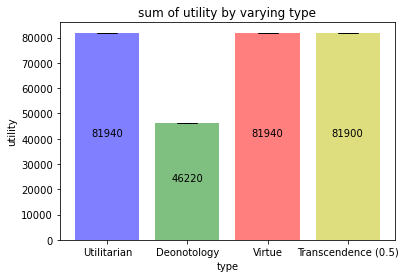

In [ ]:
plotNetworkVaryParams(num_msg_dict["outcomeNetwork"],'utility',"type",plotType='bar')

In [ ]:
gamma_dict = pickle.load(open('pickle_files/vary_gamma.pkl', 'rb'))
gamma_dict

# best_trans = gamma_dict["outcomeNetwork"][1]

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': 0,
 'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7f8375604b50>,
  0.1: <populationGraph.populationGraph at 0x7f8375691100>,
  0.2: <populationGraph.populationGraph at 0x7f8375f3f0d0>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7f83771439a0>,
  0.4: <populationGraph.populationGraph at 0x7f8377325220>,
  0.5: <populationGraph.populationGraph at 0x7f8377425ac0>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7f83774fc430>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7f83776fdd90>,
  0.8: <populationGraph.populationGraph at 0x7f8377afda60>,
  0.9: <populationGraph.populationGraph at 0x7f8377ca39d0>,
  1.0: <populationGraph.populationGraph at 0x7f8377e47a90>}}

outcome network  {0.0: <populationGraph.populationGraph object at 0x7f8375604b50>, 0.1: <populationGraph.populationGraph object at 0x7f8375691100>, 0.2: <populationGraph.populationGraph object at 0x7f8375f3f0d0>, 0.30000000000000004: <populationGraph.populationGraph object at 0x7f83771439a0>, 0.4: <populationGraph.populationGraph object at 0x7f8377325220>, 0.5: <populationGraph.populationGraph object at 0x7f8377425ac0>, 0.6000000000000001: <populationGraph.populationGraph object at 0x7f83774fc430>, 0.7000000000000001: <populationGraph.populationGraph object at 0x7f83776fdd90>, 0.8: <populationGraph.populationGraph object at 0x7f8377afda60>, 0.9: <populationGraph.populationGraph object at 0x7f8377ca39d0>, 1.0: <populationGraph.populationGraph object at 0x7f8377e47a90>}


[-45.4, -16.2, -19.0, 88.2, -7.6, 93.0, 93.0, 93.0, 93.2, 93.2, 93.2]

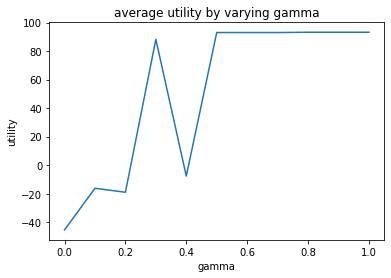

In [ ]:
plotNetworkVaryParams(gamma_dict["outcomeNetwork"],'utility',"gamma",fig_label="vary/vary_gamma",metric="mean")
# plt.savefig("/results/vary_gamma.png", dpi=600)


In [ ]:
fp_dict = pickle.load(open('pickle_files/vary_fp.pkl', 'rb'))
best_deontic = fp_dict["outcomeNetwork"][1]

outcome network  {0.0: <populationGraph.populationGraph object at 0x0000022BC4F31F90>, 0.2: <populationGraph.populationGraph object at 0x0000022BC3852AA0>, 0.4: <populationGraph.populationGraph object at 0x0000022BC498E080>, 0.6000000000000001: <populationGraph.populationGraph object at 0x0000022BC3807760>, 0.8: <populationGraph.populationGraph object at 0x0000022BC3806650>, 1.0: <populationGraph.populationGraph object at 0x0000022BC3843100>}


[-100.0, -61.8, -22.2, 15.8, 54.8, 87.2]

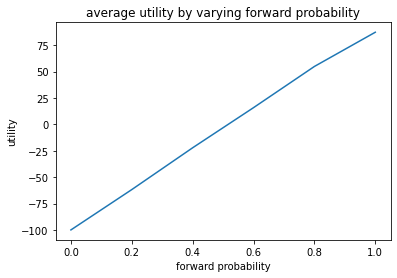

In [ ]:
plotNetworkVaryParams(fp_dict["outcomeNetwork"],'utility',"forward probability",fig_label="vary/vary_fp",metric="mean")

outcome network  {0.0: <populationGraph.populationGraph object at 0x0000022BC4F31F90>, 0.2: <populationGraph.populationGraph object at 0x0000022BC3852AA0>, 0.4: <populationGraph.populationGraph object at 0x0000022BC498E080>, 0.6000000000000001: <populationGraph.populationGraph object at 0x0000022BC3807760>, 0.8: <populationGraph.populationGraph object at 0x0000022BC3806650>, 1.0: <populationGraph.populationGraph object at 0x0000022BC3843100>}


[10.0, 11.91, 13.89, 15.79, 17.74, 19.36]

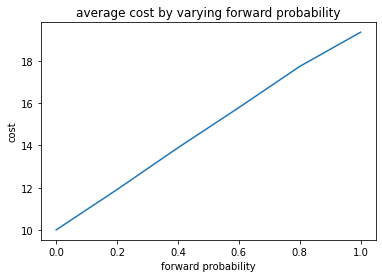

In [ ]:
plotNetworkVaryParams(fp_dict["outcomeNetwork"],'cost',"forward probability",fig_label="vary/vary_fp",metric="mean")

In [ ]:
bin_dict = pickle.load(open('pickle_files/vary_bin.pkl', 'rb'))
bin_dict
best_virtue = bin_dict["outcomeNetwork"][90]

outcome network  {0.0: <populationGraph.populationGraph object at 0x0000022BC34E03A0>, 10.0: <populationGraph.populationGraph object at 0x0000022BC56698A0>, 20.0: <populationGraph.populationGraph object at 0x0000022BC37F1F60>, 30.0: <populationGraph.populationGraph object at 0x0000022BC37F3670>, 40.0: <populationGraph.populationGraph object at 0x0000022BC2A76C20>, 50.0: <populationGraph.populationGraph object at 0x0000022BC2A76050>, 60.0: <populationGraph.populationGraph object at 0x0000022BC2B3FC40>, 70.0: <populationGraph.populationGraph object at 0x0000022BC2B3C580>, 80.0: <populationGraph.populationGraph object at 0x0000022BC34E2740>, 90.0: <populationGraph.populationGraph object at 0x0000022BC33DE1A0>}


[6.2, 52.6, 80.6, 86.4, 86.8, 86.8, 86.8, 86.8, 86.8, 86.8]

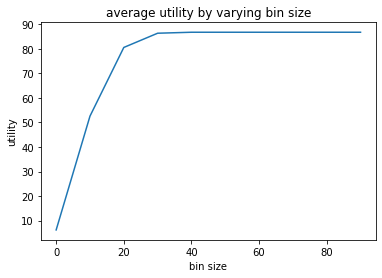

In [ ]:
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'utility',"bin size",fig_label="vary/vary_bin",metric="mean")

outcome network  {0.0: <populationGraph.populationGraph object at 0x0000022BC34E03A0>, 10.0: <populationGraph.populationGraph object at 0x0000022BC56698A0>, 20.0: <populationGraph.populationGraph object at 0x0000022BC37F1F60>, 30.0: <populationGraph.populationGraph object at 0x0000022BC37F3670>, 40.0: <populationGraph.populationGraph object at 0x0000022BC2A76C20>, 50.0: <populationGraph.populationGraph object at 0x0000022BC2A76050>, 60.0: <populationGraph.populationGraph object at 0x0000022BC2B3FC40>, 70.0: <populationGraph.populationGraph object at 0x0000022BC2B3C580>, 80.0: <populationGraph.populationGraph object at 0x0000022BC34E2740>, 90.0: <populationGraph.populationGraph object at 0x0000022BC33DE1A0>}


[11, 27, 39, 40, 40, 40, 40, 40, 40, 40]

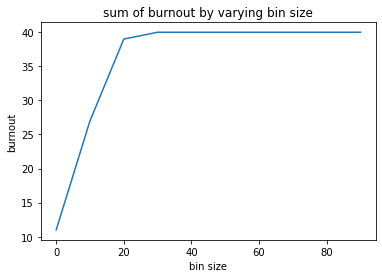

In [ ]:
plotNetworkVaryParams(bin_dict["outcomeNetwork"],'burnout',"bin size")

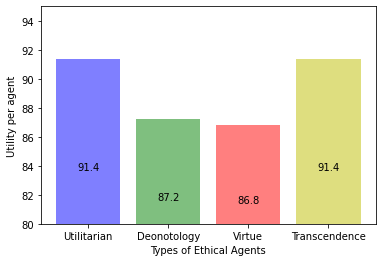

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'utility')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(80,95)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+38,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Utility per agent")
plt.savefig("results/best_bar/utility.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

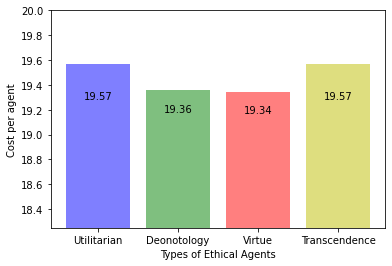

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'cost')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(18.25,20)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+9.5,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Cost per agent")
plt.savefig("results/best_bar/cost.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")

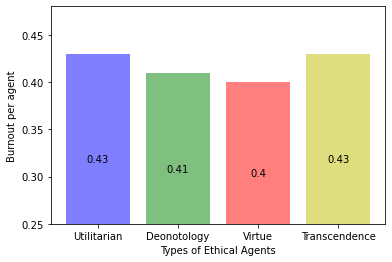

In [ ]:
y = [best_util,best_deontic,best_virtue,best_trans] 

y_vals = [np.mean(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_std = [np.std(getNetworkProp(agent.getGraph(), 'burnout')) for agent in y]
y_stderror = [value/len(y_std) for value in y_std]

x = ["Utilitarian","Deonotology", "Virtue", "Transcendence"]
plt.bar(x,y_vals, color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylim(0.25,0.48)
# plt.text(list(range(len(x))),np.zeros(len(y)),["sample" for _ in range(len(y))])#,[str(val) for val in y])
for i in range(len(x)):
    plt.text(i,y_vals[i]/2+0.1,y_vals[i],ha = 'center')
plt.xlabel("Types of Ethical Agents")
plt.ylabel("Burnout per agent")
plt.savefig("results/best_bar/burnout.png", dpi=600)
# plt.title("Parameters are set so that all ethical agents are best\n w.r.t their ethics")
    

In [ ]:
burnout_deontic = pickle.load(open('pickle_files/burnoutThreshold/deontic.pkl', 'rb'))
burnout_util = pickle.load(open('pickle_files/burnoutThreshold/util.pkl', 'rb'))
burnout_virtue = pickle.load(open('pickle_files/burnoutThreshold/virtue.pkl', 'rb'))
burnout_trans = pickle.load(open('pickle_files/burnoutThreshold/trans(0.5).pkl', 'rb'))
burnout_trans_low = pickle.load(open('pickle_files/burnoutThreshold/trans(0.1).pkl', 'rb'))
burnout_trans_high = pickle.load(open('pickle_files/burnoutThreshold/trans(1).pkl', 'rb'))

In [ ]:
burnout_trans


{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 67,
 'maxEpochs': 10000,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': 0,
 'burnoutThreshold': array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x22bc34b0970>,
  10.0: <populationGraph.populationGraph at 0x22bc54d0130>,
  20.0: <populationGraph.populationGraph at 0x22bc5572860>,
  30.0: <populationGraph.populationGraph at 0x22bc74597e0>,
  40.0: <populationGraph.populationGraph at 0x22bc74fbbb0>,
  50.0: <populationGraph.populationGraph at 0x22bc75adff0>,
  60.0: <populationGraph.populationGraph at 0x22bc7660430>,
  70.0: <populationGraph.populationGraph at 0x22bc7812830>,
  80.0: <populationGraph.populationGraph at 0x22bc78c0c70>,
  90.0: <populationGraph.populationGraph at 0x22bc37d41f0>}}

In [ ]:
burnout_dict = {"Deontology":burnout_deontic["outcomeNetwork"],
"Utilitarian":burnout_util["outcomeNetwork"],
  "Virtue":burnout_virtue["outcomeNetwork"],
  "Transcendence":burnout_trans["outcomeNetwork"]}
burnout_trans_dict = {0.1:burnout_trans_low["outcomeNetwork"],1:burnout_trans_high["outcomeNetwork"]}

In [ ]:
y_low = [np.sum(getNetworkProp(burnout_trans_dict[0.1][val].getGraph(), 'utility')) for val in burnout_trans_dict[0.1]]

[-5.0, 73.8, 91.0, 99.4, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6]

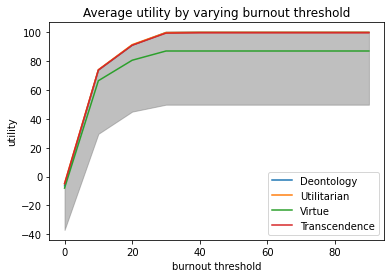

In [ ]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"utility","burnout threshold",fig_label="burnout_thresh/utility",metric="mean")

[14.75, 18.69, 19.55, 19.97, 19.98, 19.98, 19.98, 19.98, 19.98, 19.98]

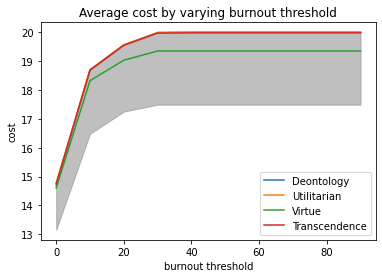

In [ ]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"cost","burnout threshold",fig_label="burnout_thresh/cost",metric="mean")

[5.24, 1.3, 0.43, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

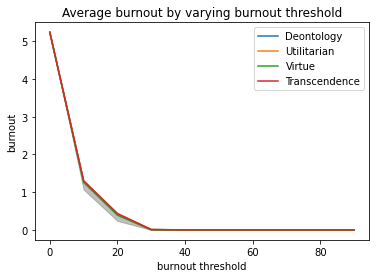

In [ ]:
plotComparative_shaded(burnout_dict,burnout_trans_dict,"burnout","burnout threshold",fig_label="burnout_thresh/burnout",metric="mean")